### The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).**

In [20]:
# import the customary libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [21]:
train = pd.read_csv(r"D:\EDA EXERCISES\TITANIC\train.csv")
test = pd.read_csv(r"D:\EDA EXERCISES\TITANIC\test.csv")

In [22]:
train.shape, test.shape

((891, 12), (418, 11))

In [23]:
combined = pd.concat([train, test], ignore_index = True)

combined.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Univariate Analysis

* Numerical Column - Histogram/Boxplot(Outlier)/Distplot
These kind of plots help us understand the shape of the data. Shape means the location of Measure of Central Tendency (Mean, Median and Mode)

* Categorical Data - We will create **Countplot** to understand the frequency of the labels in the categories.


In [24]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

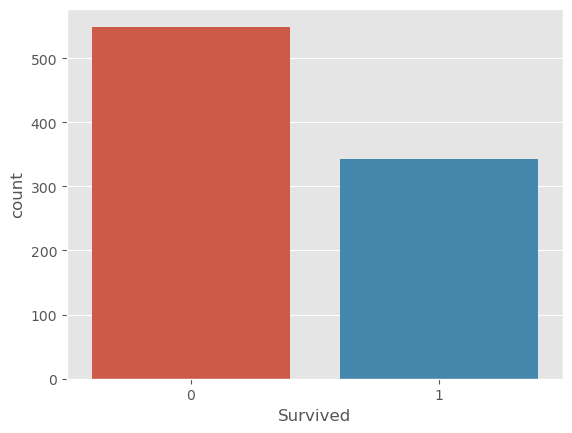

In [26]:
# Survived Plot
plt.style.use('ggplot')
sns.countplot(train.Survived)

# Inference: People who died are more than Survived

In [27]:
# Proportion
combined.Survived.value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

In [28]:
combined.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<AxesSubplot:xlabel='Pclass', ylabel='count'>

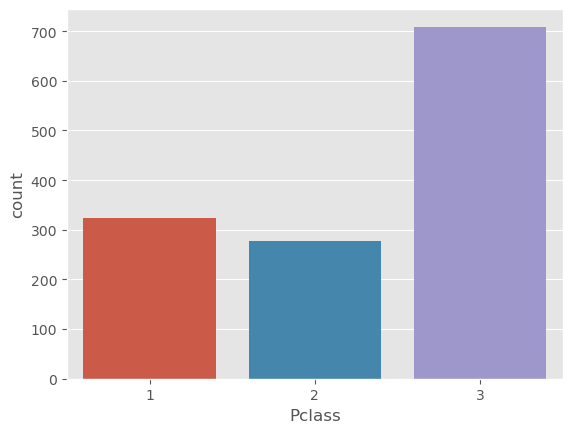

In [29]:
# PClass
sns.countplot(combined.Pclass)

# Majority of the Passengers belong to Class 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

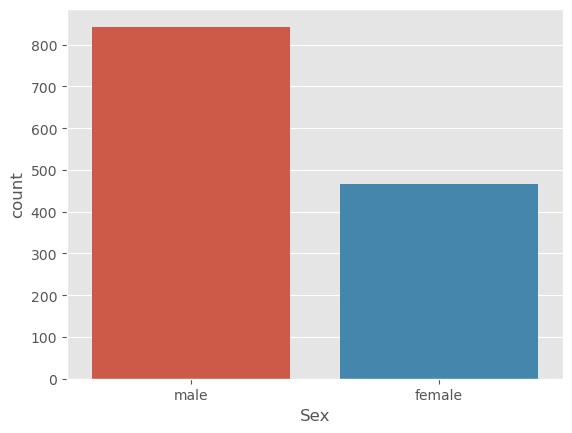

In [30]:
# Sex
sns.countplot(combined.Sex)
# Count of Males is higher than Females...

<AxesSubplot:xlabel='SibSp', ylabel='count'>

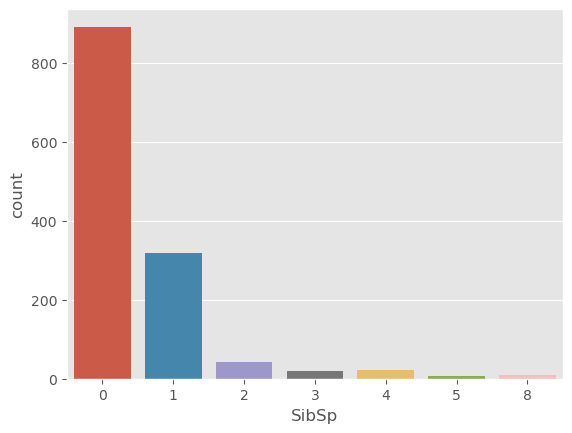

In [31]:
# SibSP
sns.countplot(combined.SibSp)
# Most of the Travellers were Solo Travellers & max no of people 
# together were 8.

# Hyp: Large Families may/may not have survived...

<AxesSubplot:xlabel='Parch', ylabel='count'>

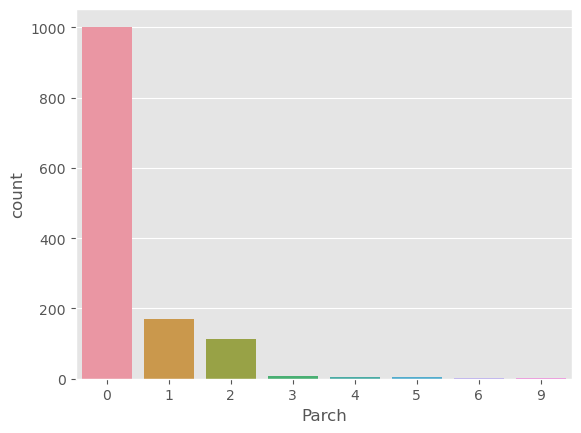

In [32]:
# Parch
sns.countplot(combined.Parch)
# Most of the Travellers were Solo Travellers & max no of people 
# together were 9.

# Hyp: Large Families may/may not have survived...

<AxesSubplot:xlabel='Embarked', ylabel='count'>

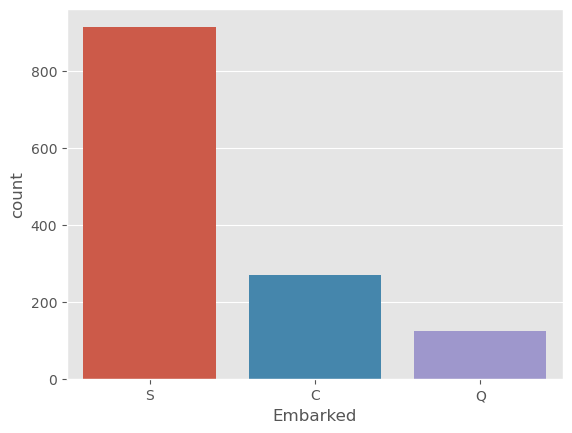

In [33]:
# Parch
sns.countplot(combined.Embarked)
# Most of the Travellers boarded from 
# Southampton followed by Cherbourg

In [34]:
# Age
combined.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

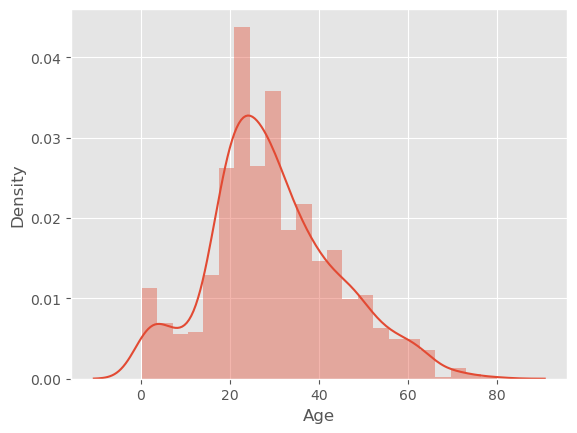

In [35]:
sns.distplot(combined.Age)

In [36]:
combined.Age.skew(), combined.Age.kurt()

(0.40767455974362266, 0.1469476357378139)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

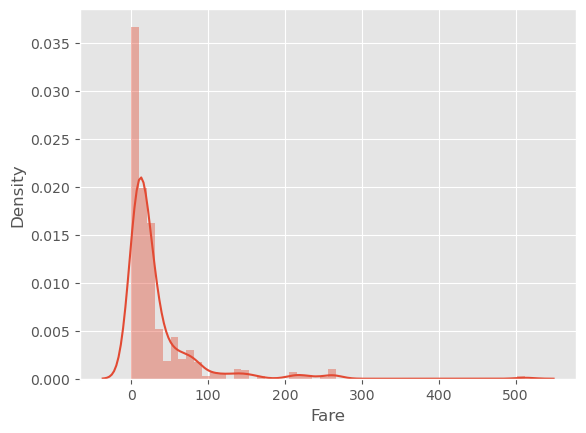

In [37]:
# Fare
sns.distplot(combined.Fare)

In [38]:
combined.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [39]:
# Unique Values in Cabin
len(combined.Cabin.unique())

187

### Bivariate Analysis

* Cat(tgt) vs Num

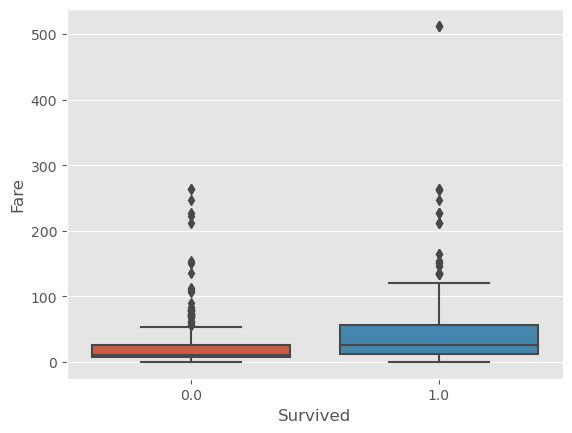

In [40]:
# Survived vs Fare
sns.boxplot(y = "Fare", x="Survived", data = combined)
plt.show()

# People who paid more fare had a higher chance of Survival...

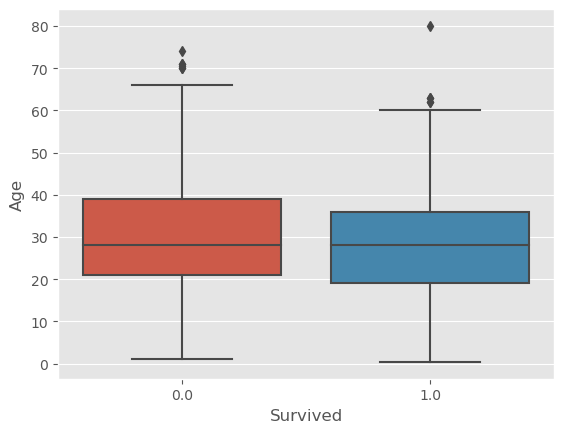

In [41]:
# Survived vs Age
sns.boxplot(y = "Age", x="Survived", data = combined)
plt.show()

# Young People had a higher chance of Survival.

<AxesSubplot:xlabel='Pclass'>

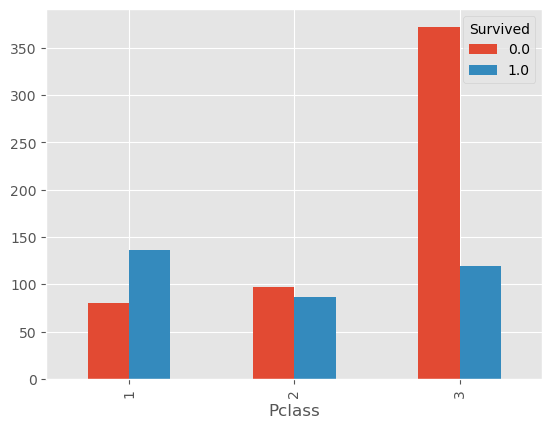

In [42]:
# Cat vs Cat
# PClass vs Survived
pd.crosstab(combined.Pclass, combined.Survived).plot(kind = "bar")

# Class 3 passengers could not Survive.
# Class 1 Passengers have a higher Survival Rate.

<AxesSubplot:xlabel='Sex'>

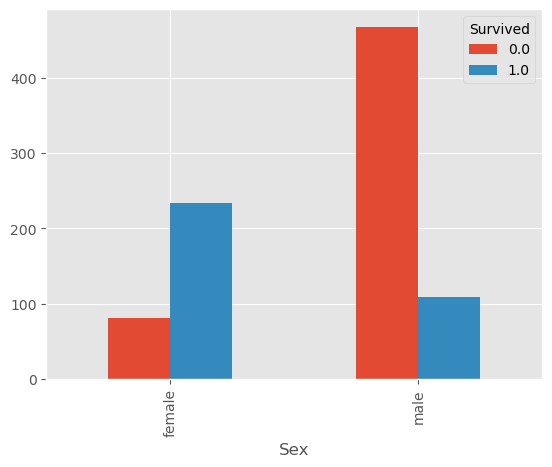

In [43]:
# Sex vs Survived
pd.crosstab(combined.Sex, combined.Survived).plot(kind = "bar")
# Males have no chance of Survival on Titanic.

<AxesSubplot:xlabel='SibSp'>

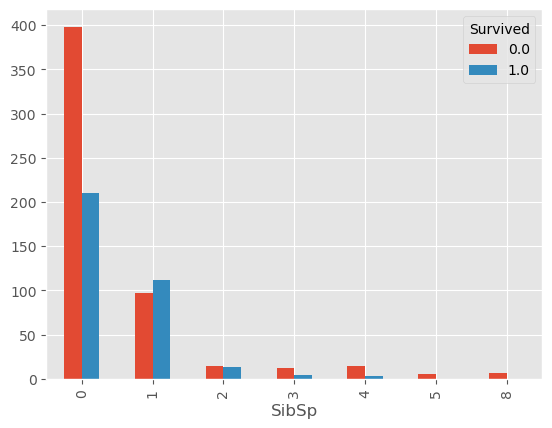

In [44]:
# SibSp vs Survived
pd.crosstab(combined.SibSp, combined.Survived).plot(kind = "bar")
# Singles & Couples had a high Chance of Survival

<AxesSubplot:xlabel='Parch'>

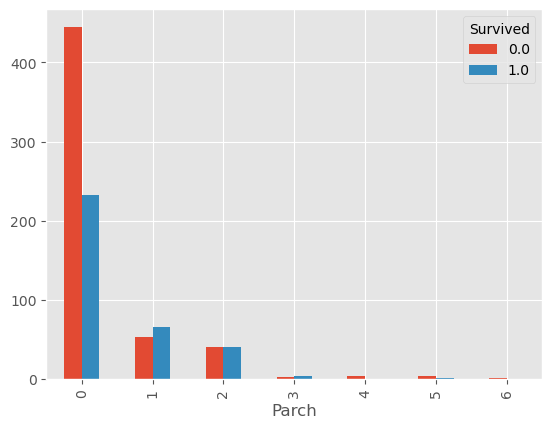

In [45]:
# Parch vs Survived
pd.crosstab(combined.Parch, combined.Survived).plot(kind = "bar")
# Singles & 02 Family Members at max were able to Survive...

<AxesSubplot:xlabel='Embarked'>

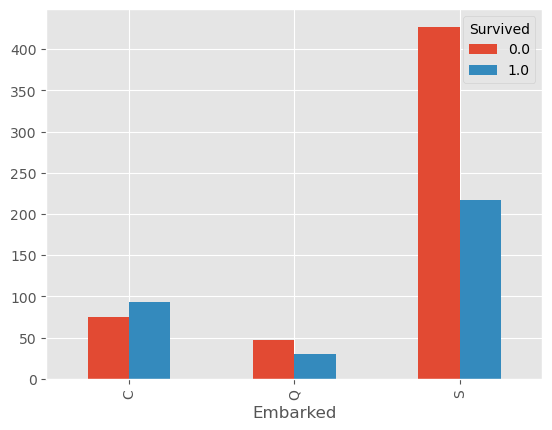

In [46]:
# Embarked vs Survived
pd.crosstab(combined.Embarked, combined.Survived).plot(kind = "bar")
# Cherbourg has a Higher Prob of Survival.

In [47]:
combined.groupby(["Embarked", "Pclass"])["Survived"].value_counts(normalize = True)

Embarked  Pclass  Survived
C         1       1.0         0.694118
                  0.0         0.305882
          2       1.0         0.529412
                  0.0         0.470588
          3       0.0         0.621212
                  1.0         0.378788
Q         1       0.0         0.500000
                  1.0         0.500000
          2       1.0         0.666667
                  0.0         0.333333
          3       0.0         0.625000
                  1.0         0.375000
S         1       1.0         0.582677
                  0.0         0.417323
          2       0.0         0.536585
                  1.0         0.463415
          3       0.0         0.810198
                  1.0         0.189802
Name: Survived, dtype: float64

In [48]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [49]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# Age basis Sex
combined.groupby("Sex")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0


In [51]:
# Age basis PCass
combined.groupby(["Pclass", "Sex"])["Age"].describe()

count       mean        std   min   25%   50%    75%   max
Pclass Sex                                                               
1      female  133.0  37.037594  14.272460  2.00  24.0  36.0  48.00  76.0
       male    151.0  41.029272  14.578529  0.92  30.0  42.0  50.00  80.0
2      female  103.0  27.499223  12.911747  0.92  20.0  28.0  34.00  60.0
       male    158.0  30.815380  13.977400  0.67  23.0  29.5  38.75  70.0
3      female  152.0  22.185329  12.205254  0.17  16.0  22.0  30.00  63.0
       male    349.0  25.962264  11.682415  0.33  20.0  25.0  32.00  74.0

In [52]:
# Pick the First Name
titles = []
for i in combined.Name:
    titles.append(i.split(", ")[1].split(". ")[0])

In [53]:
combined["Titles"] =pd.Series(titles) 

In [54]:
combined.groupby("Titles")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Titles,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.00,70.0,70.00,70.0
Col,4.0,54.000000,5.477226,47.00,51.50,54.5,57.00,60.0
Don,1.0,40.000000,NaN,40.00,40.00,40.0,40.00,40.0
Dona,1.0,39.000000,NaN,39.00,39.00,39.0,39.00,39.0
Dr,7.0,43.571429,11.731115,23.00,38.00,49.0,51.50,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.00,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.00,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.75,48.5,50.25,52.0
Master,53.0,5.482642,4.161554,0.33,2.00,4.0,9.00,14.5


In [55]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [56]:
combined.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [57]:
# Mr, Miss, Mrs, Master, Ms
# Convert the remaining titles into others
titles_ignore = ['Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

In [58]:
def ignore(x):
    if x in titles_ignore:
        return("Others")
    else:
        return(x)

In [59]:
combined["Titles"] = combined.Titles.apply(ignore)

In [60]:
combined.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others', 'Ms'], dtype=object)

In [61]:
# We will use titles to explore the age distribution
combined.groupby("Titles")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Titles,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
Others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


In [62]:
# Master
combined.loc[(combined.Titles=="Master") & (combined.Age.isnull()), 
             "Age"] = 4.0

In [63]:
# Miss
combined.loc[(combined.Titles=="Miss") & (combined.Age.isnull()), 
             "Age"] = 22.0
# Mr
combined.loc[(combined.Titles=="Mr") & (combined.Age.isnull()), 
             "Age"] = 29.0
# Mrs
combined.loc[(combined.Titles=="Mrs") & (combined.Age.isnull()), 
             "Age"] = 35.5
# Ms
combined.loc[(combined.Titles=="Ms") & (combined.Age.isnull()), 
             "Age"] = 28.0
# Others
combined.loc[(combined.Titles=="Others") & (combined.Age.isnull()), 
             "Age"] = 45.0

In [64]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Survived     418
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [65]:
# Cabin: 

combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [66]:
cabinlabels = ['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [67]:
def cabin(x):
    if x in cabinlabels:
        return("Avbl")
    else:
        return("Missing")

In [68]:
combined["Cabins"] = combined.Cabin.apply(cabin)

<AxesSubplot:xlabel='Cabins'>

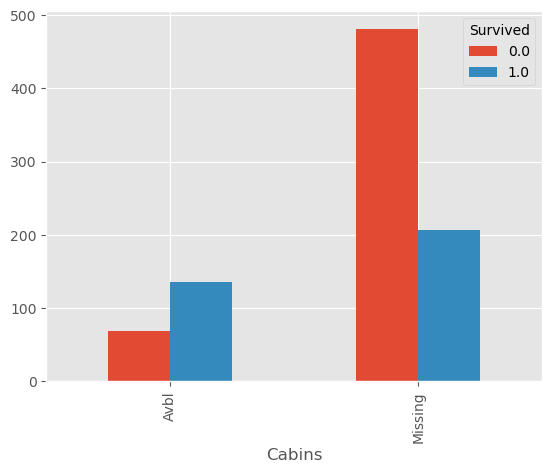

In [69]:
# Cabin Vs Survived
pd.crosstab(combined.Cabins, 
            combined.Survived).plot(kind = "bar")

In [70]:
new = combined.drop(["Name", 
                     "PassengerId", "Cabin", "Ticket"], axis = 1)

In [71]:
# Family
new["Family"]  = new.SibSp+new.Parch+1

In [72]:
new.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Cabins,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Missing,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Avbl,2


<AxesSubplot:xlabel='Family'>

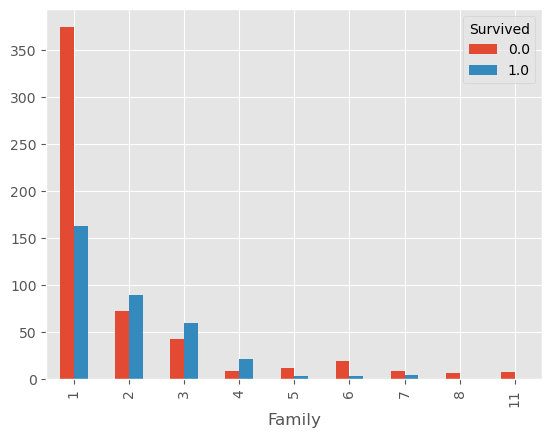

In [73]:
pd.crosstab(new.Family, new.Survived).plot(kind = "bar")

In [74]:
# Bin the Family
def fam(x):
    if (x>=5):
        return("Large_Family")
    elif(x>=3):
        return("Small_Family")
    elif(x==2):
        return("Couples")
    else:
        return("Singles")

In [75]:
new["Family_Cat"] = new.Family.apply(fam)

<AxesSubplot:xlabel='Family_Cat'>

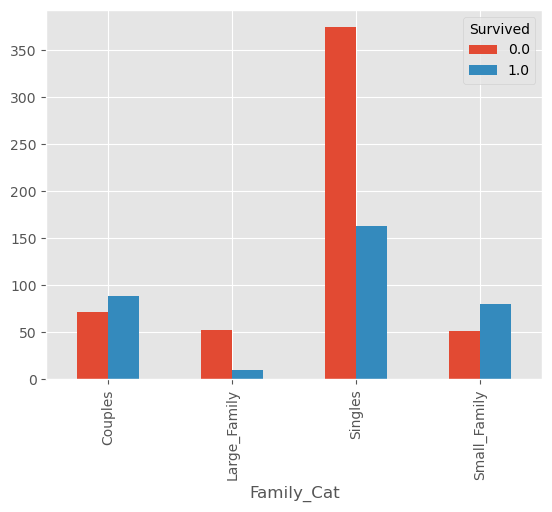

In [76]:
pd.crosstab(new.Family_Cat, 
            new.Survived).plot(kind = "bar")

In [77]:
new.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Cabins,Family,Family_Cat
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Missing,2,Couples
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Avbl,2,Couples


In [78]:
# Fare Per Person
new["Fare_Per_Head"] = new.Fare/new.Family

In [79]:
new.loc[new.Fare.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Cabins,Family,Family_Cat,Fare_Per_Head
1043,NaN,3,male,60.5,0,0,NaN,S,Mr,Missing,1,Singles,NaN


In [80]:
# PLcass = 3
# Title=Mr
# Cabin = Missing
# Family_Cat = Singles

new.loc[(new.Pclass==3) & (new.Titles=="Mr") & 
        (new.Cabins=="Missing") & (new.Family_Cat=="Singles"),
        "Fare"].median()

7.8958

In [81]:
new.loc[new.Fare.isnull(), "Fare"] = new.loc[(new.Pclass==3) & (new.Titles=="Mr") & 
        (new.Cabins=="Missing") & (new.Family_Cat=="Singles"),
        "Fare"].median()

In [82]:
# Embarked
new.loc[new.Embarked.isnull(), "Embarked"]="C"

In [83]:
new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Cabins,Family,Family_Cat,Fare_Per_Head
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Missing,2,Couples,3.62500
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Avbl,2,Couples,35.64165
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Missing,1,Singles,7.92500
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Avbl,2,Couples,26.55000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Missing,1,Singles,8.05000


In [84]:
# Count of PClass using Gender, Embarked, Title & Cabins
new["magic1"] = new.groupby(["Sex", "Embarked", 
                             "Titles", 
                "Cabins"])["Pclass"].transform("count")

In [85]:
# Median Fare basis Pclass, Titles, Embarked, Family_Cat
new["magic2"] = new.groupby(["Pclass", "Embarked", 
             "Titles", "Cabins", 
                "Family_Cat"])["Fare"].transform('median')

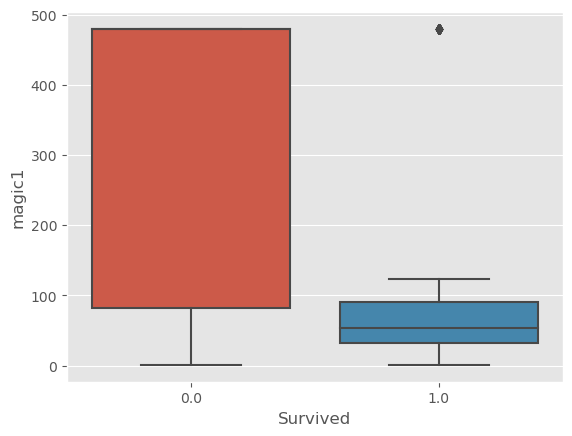

In [86]:
sns.boxplot(x = "Survived", y = "magic1", data = new)
plt.show()

In [87]:
new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Cabins,Family,Family_Cat,Fare_Per_Head,magic1,magic2
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Missing,2,Couples,3.62500,480,15.0250
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Avbl,2,Couples,35.64165,32,83.1583
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Missing,1,Singles,7.92500,123,7.9250
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Avbl,2,Couples,26.55000,43,60.0000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Missing,1,Singles,8.05000,480,7.8958


In [88]:
# Split the Data into Train and Test
train.shape, test.shape

((891, 12), (418, 11))

In [89]:
newtrain = new.loc[0:train.shape[0]-1, :]

newtest = new.loc[train.shape[0]:, :]

In [90]:
newtest.drop("Survived", axis = 1, inplace = True)

In [91]:
newtrain.shape, newtest.shape

((891, 15), (418, 14))

### Scaling

In [92]:
# Convert the Tgt into Int
newtrain["Survived"] = newtrain.Survived.astype("int")

In [93]:
newtrain.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles,Cabins,Family,Family_Cat,Fare_Per_Head,magic1,magic2
0,0,3,male,22.0,1,0,7.2500,S,Mr,Missing,2,Couples,3.62500,480,15.0250
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Avbl,2,Couples,35.64165,32,83.1583


In [94]:
# Scale the Age, Fare and Fare_Per_Head
cols = ["Age", "Fare", "Fare_Per_Head"]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in cols:
    newtrain.loc[:, cols] = sc.fit_transform(newtrain.loc[:, cols])
    newtest.loc[:, cols] = sc.transform(newtest.loc[:, cols])

In [95]:
dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

In [96]:
dummytrain.shape, dummytest.shape

((891, 22), (418, 21))

In [97]:
dummytrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Fare_Per_Head,magic1,magic2,...,Embarked_S,Titles_Miss,Titles_Mr,Titles_Mrs,Titles_Ms,Titles_Others,Cabins_Missing,Family_Cat_Large_Family,Family_Cat_Singles,Family_Cat_Small_Family
0,0,3,-0.552307,1,0,-0.502445,2,-0.454798,480,15.0250,...,1,0,1,0,0,0,1,0,0,0
1,1,1,0.657044,1,0,0.786845,2,0.438994,32,83.1583,...,0,0,0,1,0,0,0,0,0,0
2,1,3,-0.249969,0,0,-0.488854,1,-0.334757,123,7.9250,...,1,1,0,0,0,0,1,0,1,0
3,1,1,0.430291,1,0,0.420730,2,0.185187,43,60.0000,...,1,0,0,1,0,0,0,0,0,0
4,0,3,0.430291,0,0,-0.486337,1,-0.331267,480,7.8958,...,1,0,1,0,0,0,1,0,1,0


### Random Forest Model

In [102]:
dummytest.Fare_Per_Head.fillna(dummytest.Fare_Per_Head.mean(),inplace=True)

In [104]:
from sklearn.ensemble import RandomForestClassifier

X = dummytrain.drop("Survived", axis = 1)
y = dummytrain.Survived

rf = RandomForestClassifier(criterion = "entropy")
pred = rf.fit(X,y).predict(dummytest)

In [105]:
# Submission File

soln = pd.DataFrame({"PassengerId":test.PassengerId, 
                     "Survived":pred})

In [106]:
# Export it outside
soln.to_csv("RfModel.csv", index = False) # 73.44%

In [107]:
cd

C:\Users\KRITGYA KASHYAP
